### One dimensional polynomial test

Eigenvalues: 	[0.32145669 4.4769138 ]
beta OLS: 	[[4.44217762 2.67379312]]
Beta Grad: 	[[4.44217762 2.67379312]]


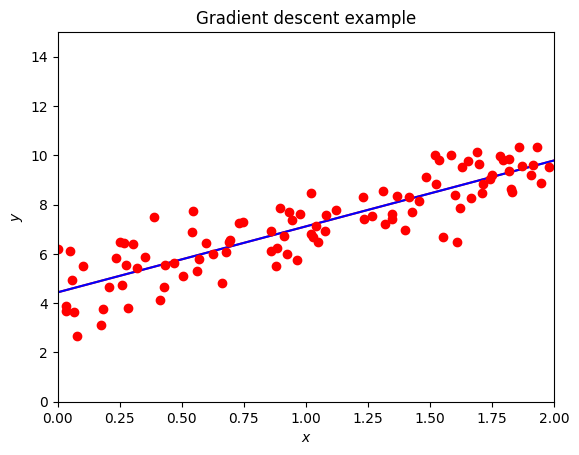

In [1]:
# One dimensional polynomial test
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

n = 100
x = 2*np.random.rand(n,1)
y = 4 + 3*x +np.random.randn(n,1)

# Building feature matrix
X = np.c_[np.ones((n,1)), x]
# Hessian matrix
H = (2.0/n) * X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues: \t{EigValues}") # --> we use this to determine the best values for the Learning Rate (eta)

# beta with OLS computation
beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'beta OLS: \t{beta_linreg.T}')

# beta with Gradient
beta = np.random.rand(2,1)

# Learning Rate and Number of Iterations
eta = 1.00 / np.max(EigValues) # --> inverse of the Eigenvalues
Niterations = 1000

# Gradient execution
for iter in range(Niterations):
    gradient = (2.0/n) * X.T @ (X @ beta - y)
    beta -= eta * gradient
    
print(f'Beta Grad: \t{beta.T}')

# new points
xnew = np.array([[0], [2]])
xbnew = np.c_[np.ones((2,1)), xnew]
# prediction with gradient
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)

# Plot
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y, 'ro')
plt.axis([0, 2.0, 0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

Eigenvalues: 	[92.77474113  1.19292238  0.55506333]
beta OLS: 	[[1.80758657 3.08460595 0.98785254]]
Beta Grad: 	[[1.80969943 3.08061554 0.98887131]]


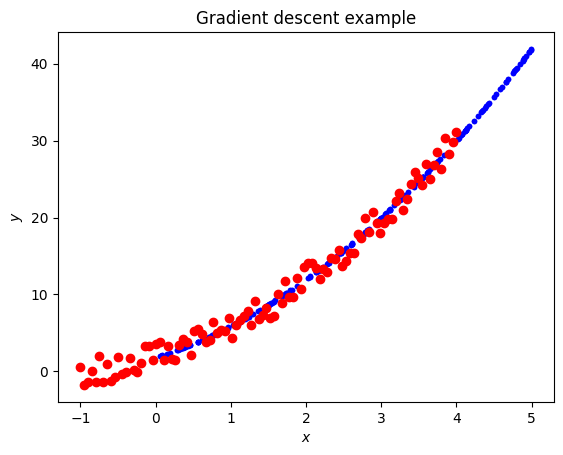

In [2]:
n = 100
x = np.linspace(-1, 4, n).reshape(-1, 1)
y = 1 * x**2 + 3 * x + 4*np.random.rand(n,1)

# Building feature matrix
X = np.c_[np.ones((n,1)), x, x**2]
# Hessian matrix
H = (2.0/n) * X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues: \t{EigValues}") # --> we use this to determine the best values for the Learning Rate (eta)

# beta with OLS computation
beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'beta OLS: \t{beta_linreg.T}')

# beta with Gradient
beta = np.random.rand(3,1)

# Learning Rate and Number of Iterations
eta = 1.00 / np.max(EigValues) # --> inverse of the Eigenvalues
Niterations = 1000

# Gradient execution
for iter in range(Niterations):
    gradient = (2.0/n) * X.T @ (X @ beta - y)
    beta -= eta * gradient
    
print(f'Beta Grad: \t{beta.T}')

# new points
xnew = np.random.rand(200,1) * 5
xbnew = np.c_[np.ones((200, 1)), xnew, xnew**2]
# prediction with gradient
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)

# Plot
plt.plot(xnew, ypredict, "b.")
plt.plot(xnew, ypredict2, "b.")
plt.plot(x, y, 'ro')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

### GD in OLS

Eigenvalues: 	[95.6606211   1.18379665  0.52489721]
beta OLS: 	[[1.71997644 3.15781477 0.96834756]]
Beta Grad: 	[[1.72297457 3.15222801 0.96976985]]
MSE OLS: 	0.99102
MSE gd: 	0.99077


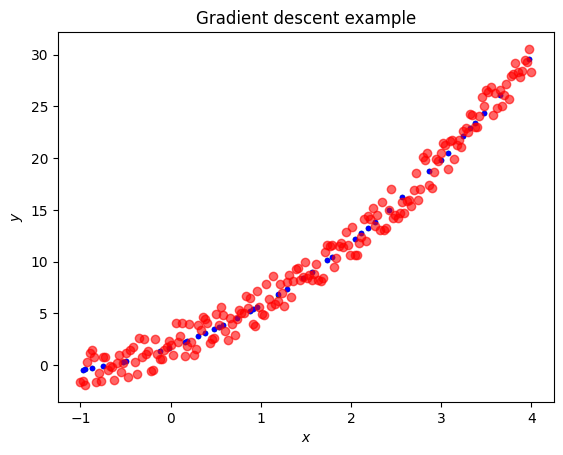

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

n = 200
x = np.linspace(-1, 4, n).reshape(-1, 1)
y = 1 * x**2 + 3 * x + 4*np.random.rand(n,1)

# Building feature matrix
X = np.c_[np.ones((n,1)), x, x**2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Hessian matrix
n = X_train.shape[0]
H = (2.0/n) * X_train.T @ X_train
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues: \t{EigValues}") # --> we use this to determine the best values for the Learning Rate (eta)

# beta with OLS computation
beta_linreg = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(f'beta OLS: \t{beta_linreg.T}')

# beta with Gradient
beta = np.random.rand(3,1)

# Learning Rate and Number of Iterations
eta = 1.00 / np.max(EigValues) # --> inverse of the Eigenvalues
Niterations = 1000

# Gradient execution
for iter in range(Niterations):
    gradient = (2.0/n) * X_train.T @ (X_train @ beta - y_train)
    beta -= eta * gradient
    
print(f'Beta Grad: \t{beta.T}')


# prediction with gradient
ypredict = X_test @ beta
ypredict2 = X_test @ beta_linreg

mse_pred1 = mean_squared_error(y_test, ypredict)
mse_pred2 = mean_squared_error(y_test, ypredict2)
print(f'MSE OLS: \t{mse_pred2:.5f}')
print(f'MSE gd: \t{mse_pred1:.5f}')


# Plot
plt.plot(X_test[:,1], ypredict, "g.")
plt.plot(X_test[:,1], ypredict2, "b.")
plt.plot(x, y, 'ro', alpha = 0.6)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

In [4]:
# OLS and Ridge with GD

from random import random, seed
import numpy as np

# the number of datapoints with a 2nd-order polynomial
n = 1000
x = 2*np.random.rand(n,1)
y = 4+3*x+5*x*x

# Design matrix including the intercept
# No scaling of data of and all data used for training 
X = np.c_[np.ones((n,1)), x, x*x]
H = (2.0/n) * X.T @ X
EigValues, Eigvectors = np.linalg.eig(H)

# Learning rate and number of iterations
eta = 1.00 / np.max(EigValues) # --> Learning Rate tuned with the Hessian matrix
# eta = 0.05 # fixed learning rate 
Niterations = 100

# OLS part
beta_OLS = np.random.randn(3,1) # --> initialize
gradient = np.zeros(3)

for iter in range(Niterations):
    gradient = (2.0/n)*X.T @ (X @ beta_OLS - y)
    beta_OLS -= eta*gradient
print('Parameters for OLS using gradient descent')
print(beta_OLS)

#Ridge parameter Lambda
Lambda  = 0.01
Id = n*Lambda* np.eye((X.T @ X).shape[0])
beta_Ridge = np.random.randn(3,1)
gradient = np.zeros(3)

for iter in range(Niterations):
    gradients = 2.0/n*X.T @ (X @ beta_Ridge-y)+2*Lambda*beta_Ridge
    beta_Ridge -= eta*gradients
print('Parameters for Ridge using gradient descent')    
print(beta_Ridge)

Parameters for OLS using gradient descent
[[3.8870957 ]
 [3.2952728 ]
 [4.86217268]]
Parameters for Ridge using gradient descent
[[3.6941558 ]
 [3.70009574]
 [4.67428695]]


In [5]:
# OLS and Ridge with GD with Momentum

from random import random, seed
import numpy as np


n = 1000
x = 2*np.random.rand(n,1)
y = 4+3*x+5*x*x

# Design matrix
X = np.c_[np.ones((n,1)), x, x*x]
H = (2.0/n) * X.T @ X
EigValues, Eigvectors = np.linalg.eig(H)

# Learning rate and number of iterations
eta = 1.00 / np.max(EigValues)  # Learning Rate tuned with the Hessian matrix
Niterations = 100

# Momentum factor
gamma = 0.6                      # range [0.5, 0.9]

### OLS with Momentum ###
beta_OLS = np.random.randn(3,1)
gradient = np.zeros((3,1))
v = np.zeros((3,1))              # Initialize momentum vector

for iter in range(Niterations):
    gradient = (2.0/n) * X.T @ (X @ beta_OLS - y)  # Calculate gradient
    v = gamma * v + eta * gradient                 # Update momentum
    beta_OLS -= v                                  # Update parameters with momentum

print('Parameters for OLS using gradient descent with Momentum')
print(beta_OLS)

### Ridge with Momentum ###
Lambda  = 0.01
Id = n * Lambda * np.eye((X.T @ X).shape[0])

beta_Ridge = np.random.randn(3,1)  # Initialize Ridge parameters
gradient = np.zeros((3,1))         # Initialize gradient
v_ridge = np.zeros((3,1))          # Initialize momentum vector for Ridge

for iter in range(Niterations):
    gradient = (2.0/n) * X.T @ (X @ beta_Ridge - y) + 2 * Lambda * beta_Ridge  # Gradient with regularization
    v_ridge = gamma * v_ridge + eta * gradient                                 # Update momentum
    beta_Ridge -= v_ridge

print('Parameters for Ridge using gradient descent with Momentum')
print(beta_Ridge)

Parameters for OLS using gradient descent with Momentum
[[3.77368555]
 [3.62292499]
 [4.70327165]]
Parameters for Ridge using gradient descent with Momentum
[[3.91647939]
 [3.11942823]
 [4.94510864]]


Own inversion
[[3.83607782]
 [3.16667363]]
Eigenvalues of Hessian Matrix:[0.3481401  3.78703315]
theta from own sdg
[[3.82443667]
 [3.15677815]]


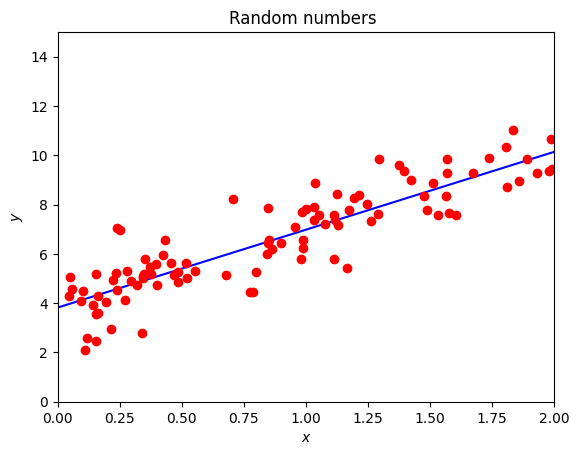

In [6]:
# stochastic gradient descent with mini batches and a given number of epochs.

%matplotlib inline
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000

# Add mini baches and number of epochs
n_epochs = 50
M = 5                                  # size of each minibatch
m = int(n/M)                           # number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (2.0/M)* xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)

plt.plot(xnew, ypredict, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

In [7]:
# AdaGrad and Stochastic Gradient descent

from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

### OLS ###
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("theta from OLS")
print(theta_linreg)

training_gradient = grad(CostOLS,2)
n_epochs = 50
M = 5                         # size of each minibatch
m = int(n/M)                  # number of minibatches
theta = np.random.randn(3,1)

eta = 0.01 # fixed

# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = 0.0
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        Giter += gradients*gradients
        update = gradients*eta/(delta+np.sqrt(Giter))
        theta -= update
print("theta from OLS using AdaGrad")
print(theta)

### Ridge ###
Lambda  = 0.01
Id = n*Lambda* np.eye((X.T @ X).shape[0])
beta_Ridge = np.random.randn(3,1)
gradient = np.zeros(3)

for iter in range(Niterations):
    gradients = 2.0/n*X.T @ (X @ beta_Ridge-y)+2*Lambda*beta_Ridge
    beta_Ridge -= eta*gradients

print('theta from Ridge')
print(beta_Ridge)

# Including AdaGrad params
Giter_ridge = np.zeros((3, 1))
Niterations = 100

for iter in range(Niterations):
    gradients = (2.0 / n) * X.T @ (X @ beta_Ridge - y) + 2 * Lambda * beta_Ridge
    Giter_ridge += gradients ** 2                                       # Accumulate the squared gradients
    update = gradients * eta / (delta + np.sqrt(Giter_ridge))           # Adjust the update step
    beta_Ridge -= update                                                # Update the parameters

print('theta from Ridge using AdaGrad')
print(beta_Ridge)

theta from OLS
[[2.]
 [3.]
 [4.]]
theta from OLS using AdaGrad
[[1.99992223]
 [3.00036782]
 [3.99966239]]
theta from Ridge
[[2.09950058]
 [3.10522822]
 [3.505121  ]]
theta from Ridge using AdaGrad
[[2.04024569]
 [3.24646267]
 [3.45285111]]


In [8]:
# RMSprop and ADAM

from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


### RMSprop ###
training_gradient = grad(CostOLS,2)
n_epochs = 50
M = 5
m = int(n/M)

theta = np.random.randn(3,1)
eta = 0.01
rho = 0.99
delta  = 1e-8

for epoch in range(n_epochs):
    Giter = 0.0
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        Giter = (rho*Giter+(1-rho)*gradients*gradients)        # Scaling with rho the new and the previous results
        update = gradients*eta/(delta+np.sqrt(Giter))          # Taking the diagonal only and inverting
        theta -= update                                        # Hadamard product
print("theta from own RMSprop")
print(theta)


### ADAM ###
# Value for parameters beta1 and beta2, see https://arxiv.org/abs/1412.6980
beta1 = 0.9
beta2 = 0.999
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-7
iter = 0

for epoch in range(n_epochs):
    first_moment = 0.0
    second_moment = 0.0
    iter += 1
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        # Computing moments first
        first_moment = beta1*first_moment + (1-beta1)*gradients
        second_moment = beta2*second_moment+(1-beta2)*gradients*gradients
        first_term = first_moment/(1.0-beta1**iter)
        second_term = second_moment/(1.0-beta2**iter)
	# Scaling with rho the new and the previous results
        update = eta*first_term/(np.sqrt(second_term)+delta)
        theta -= update
print("theta from own ADAM")
print(theta)

Own inversion
[[2.]
 [3.]
 [4.]]
theta from own RMSprop
[[2.00093184]
 [3.00198585]
 [4.00178354]]
theta from own ADAM
[[2.00002332]
 [2.99983766]
 [4.00016046]]
